<div>
<img img class="logo" src="https://medialib.cmcdn.dk/medialibrary/51432DDB-BBE3-4327-85F4-BE3493077470/1D874B35-F493-EC11-84B2-00155D0B0901.png" style="width: 100px;" align="right">
</div>

# <center> Final Examination - XYZ Carseats Prediction

### <center> KAN-CDSCV1008U  Applied Machine Learning and Data Engineering in Business Context

In [1]:
# Importing modules 
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import os

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Importing datasets 
path_fredrik = "C:/Users/fredr/OneDrive/Documents/Master/Semester_3/Applied ML/AppliedMachineLearning/Data/"
path_guest = ""

os.chdir(path_fredrik)
path = os.getcwd()
print(path)

df = pd.read_csv("Carseats.csv")
df.head()

C:\Users\fredr\OneDrive\Documents\Master\Semester_3\Applied ML\AppliedMachineLearning\Data


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [7]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
#checking for missing values
print('==== Complete Data ====')
print(df.isna().sum())

==== Complete Data ====
Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64


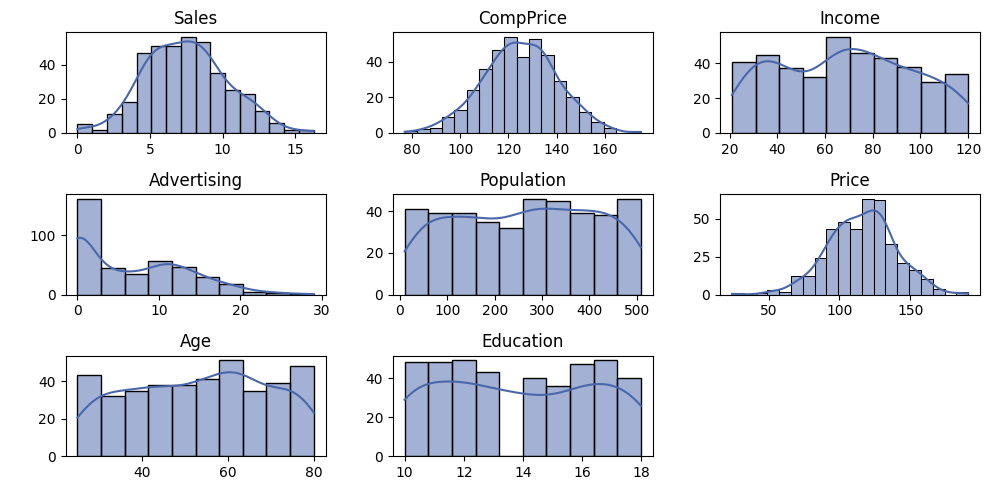

In [3]:
# Visualizing numerical features
num_features = df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features):
    ax = fig.add_subplot(3, 3, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

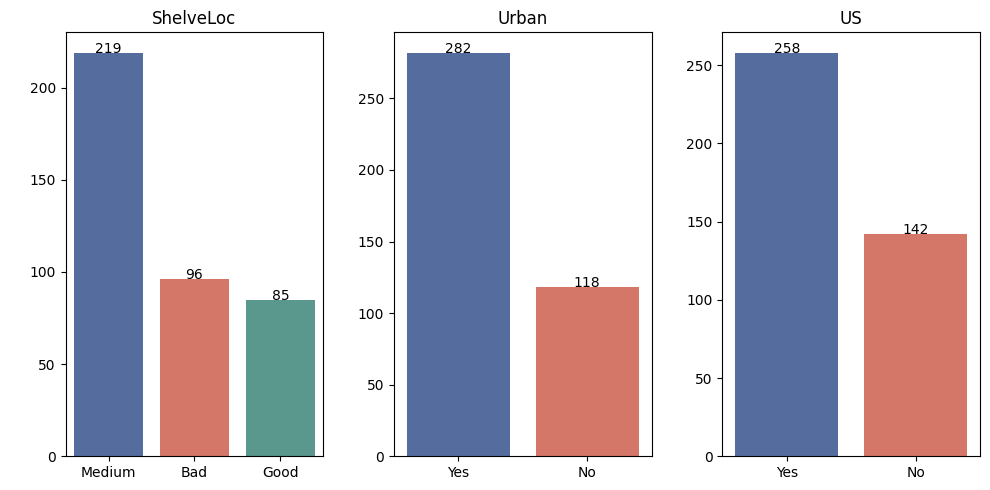

In [4]:
# Visualizing categorical features
cat_features = df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_df = df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_df, x=value_counts_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

### Data Preprocessing

`Label Encoding`

In [35]:
# Copying the dataframe
df1 = df.copy()
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [36]:
# Creating dummy features
df1 = pd.get_dummies(df1, columns=['ShelveLoc'], prefix='ShelveLoc')
df1 = pd.get_dummies(df1, columns=['Urban'], prefix='Urban')
df1 = pd.get_dummies(df1, columns=['US'], prefix='US')
df1.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,1,0,0,0,1,1,0


### Pattern Recognition

In [7]:
#correlation matrix to see which features are highly correlated to the churn feature
corr_matrix = df1.corr()
corr_matrix["Sales"].sort_values(ascending=False)

Sales               1.000000
ShelveLoc_Good      0.500510
Advertising         0.269507
US_Yes              0.177093
Income              0.151951
CompPrice           0.064079
Population          0.050471
Urban_No            0.015419
Urban_Yes          -0.015419
Education          -0.051955
ShelveLoc_Medium   -0.073999
US_No              -0.177093
Age                -0.231815
ShelveLoc_Bad      -0.393167
Price              -0.444951
Name: Sales, dtype: float64

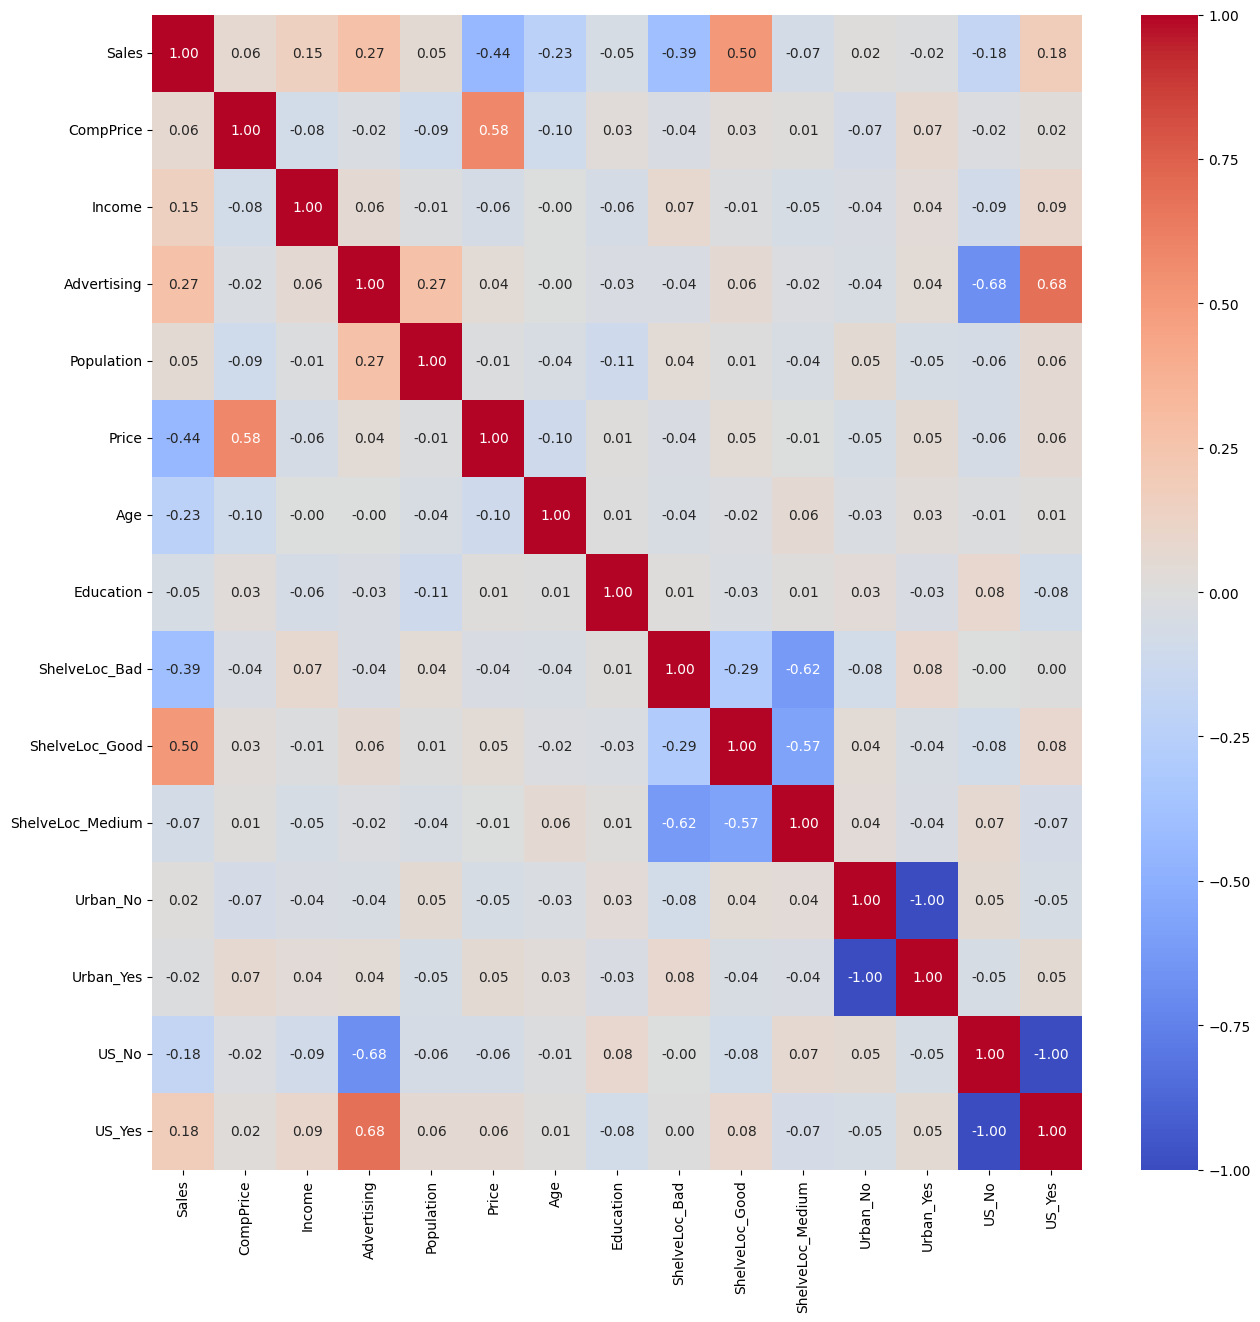

In [8]:
# Create a heatmap of the correlation
decimal_places = 2
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot=True, fmt=f'.{decimal_places}f', cmap='coolwarm') 
plt.show()

In [9]:
def visualize_high_correlation(df, pos_threshold=0.5, neg_threshold=-0.5):
    # Calculate correlation matrix
    corr_matrix = df.corr()

    # Iterate through all feature pairs
    for i in range(len(corr_matrix.columns)):
        for j in range(i + 1, len(corr_matrix.columns)):
            feature1 = corr_matrix.columns[i]
            feature2 = corr_matrix.columns[j]
            
            correlation_coefficient = corr_matrix.iloc[i, j]

            # Check if correlation is above the positive threshold or below the negative threshold
            if abs(correlation_coefficient) > max(pos_threshold, abs(neg_threshold)):
                # Create a scatter plot
                sns.scatterplot(x=df[feature1], y=df[feature2])
                plt.title(f'Scatter Plot of {feature1} vs {feature2} (Correlation: {correlation_coefficient:.2f})')
                plt.xlabel(feature1)
                plt.ylabel(feature2)
                plt.show()

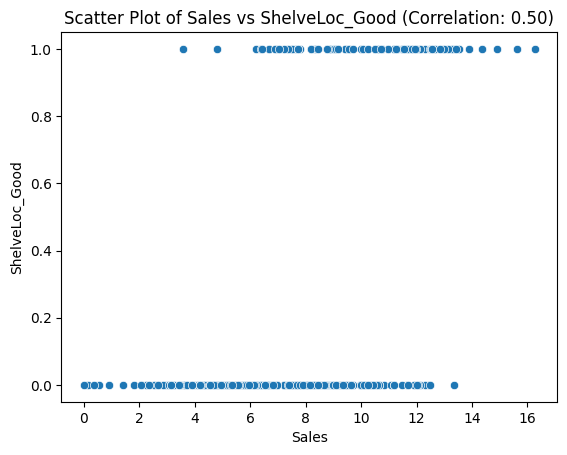

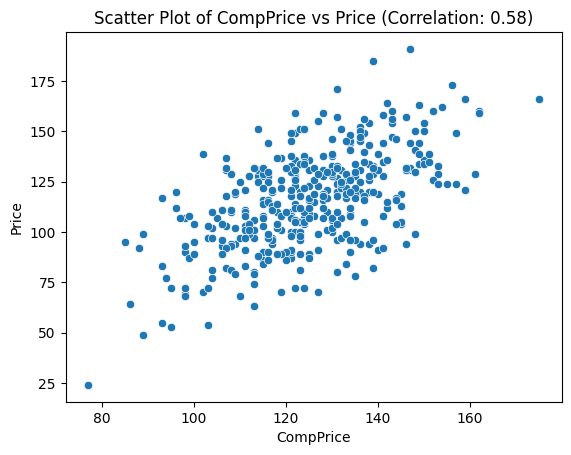

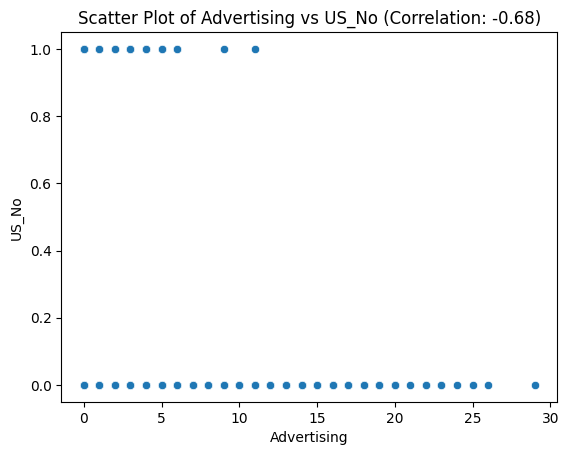

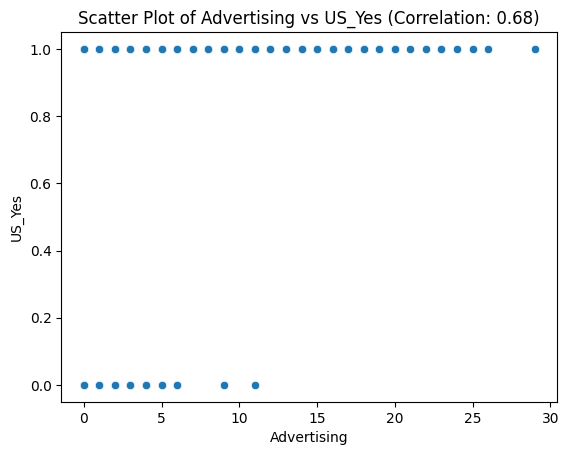

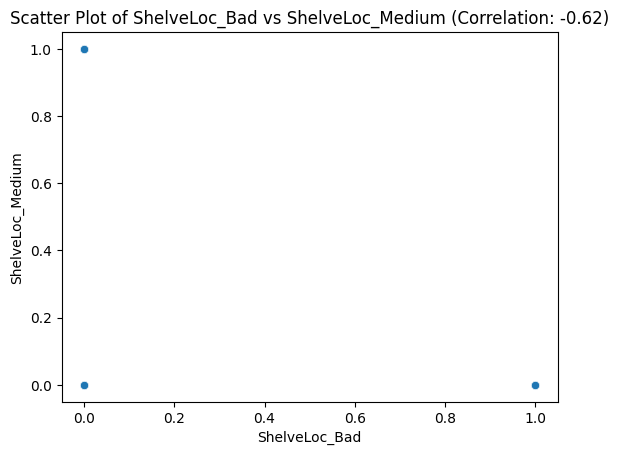

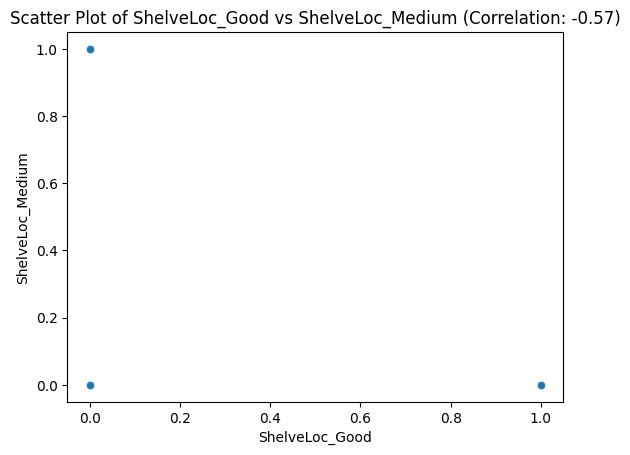

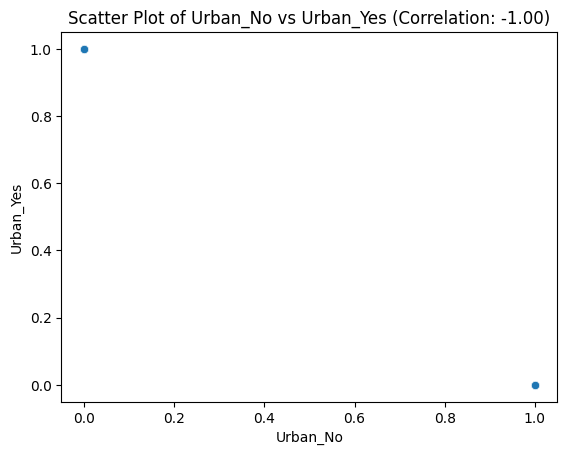

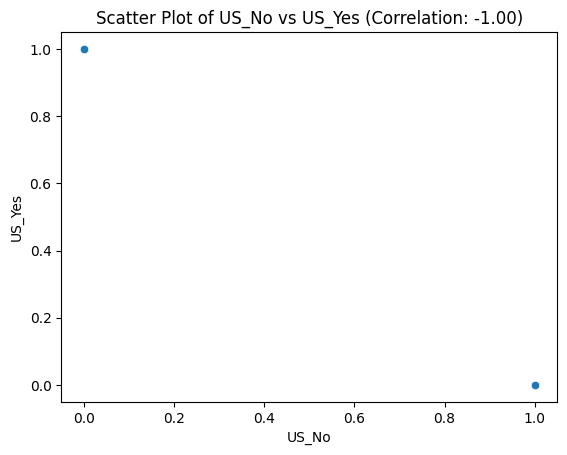

In [10]:
visualize_high_correlation(df1)

Multiple plots were created by the function, however, after inspecting the plots we can see that there is colinearity between CompPrice and Price. This needs to be adjusted for. 

`Feature Engineering`

In [37]:
# Creating new feature to handle colinearity
df1["PriceDiff"] = df1["Price"] - df1["CompPrice"]
df1.drop(columns=['CompPrice', 'Price'], inplace=True)
df1.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [12]:
# Checking correlation for the new feature 
corr_PD = df1[['Sales', 'PriceDiff']]
corr_PD.corr()

,Sales,PriceDiff
Sales,1.000000,-0.597922
PriceDiff,-0.597922,1.000000


We can see that PriceDiff removes the colinearity between Price and CompPrice. 

`Splitting the data`

In [38]:
# Defining dependent and independent features 
X = df1.drop(columns=['Sales'])
y = df1['Sales']


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state = 45)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(320, 13) (80, 13) (320,) (80,)


### Sales Prediction

In [14]:
def evaluate_regression(y_true, y_pred, model_name):
    # Calculating evaluation metrics
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    # Printing the model name
    print(f"\033[34m{model_name}\033[0m")

    # Printing the evaluation metrics
    print(f" \033[32mMean Squared Error:\033[0m {mse:.4f}")
    print(f" \033[32mMean Absolute Error:\033[0m {mae:.4f}")
    print(f" \033[32mR-squared (R2):\033[0m {r2:.4f}")

    return mse, mae, r2

`Linear Regression`

In [15]:
# Initialising Linear regression 
osl = LinearRegression()
osl.fit(X_train, y_train)

LinearRegression()

In [16]:
# Evaluating the results 
y_pred_osl = osl.predict(X_test)
evaluate_regression(y_test, y_pred_osl, osl)

LinearRegression()
 Mean Squared Error: 1.0767
 Mean Absolute Error: 0.8264
 R-squared (R2): 0.8272


(1.0766750137260068, 0.8264207517153824, 0.8271514509500234)

`DecisionTrees`

In [17]:
# Initialise DecisionTree Regressor
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [18]:
# Evaluating the results 
y_pred_dt = dt.predict(X_test)
evaluate_regression(y_test, y_pred_dt, dt)

DecisionTreeRegressor()
 Mean Squared Error: 2.9616
 Mean Absolute Error: 1.3749
 R-squared (R2): 0.5246


(2.9615737500000003, 1.3748749999999998, 0.5245513092939036)

`Random Forest`

In [19]:
# Initialise Random Forest
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
# Evaluating the results 
y_pred_rf = rf.predict(X_test)
evaluate_regression(y_test, y_pred_rf, rf)

RandomForestRegressor()
 Mean Squared Error: 1.6751
 Mean Absolute Error: 1.0309
 R-squared (R2): 0.7311


(1.6750911042500007, 1.0309225, 0.7310822084612643)

Got worse results from doing the Gridsearch, so the default parameters proves to be the best. 

`XGBoost`

In [21]:
# Initialise XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [22]:
# Evaluating the results 
y_pred_xgb = xgb.predict(X_test)
evaluate_regression(y_test, y_pred_xgb, xgb)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
 Mean Squared Error: 1.9223
 Mean Absolute Error: 1.1129
 R-squared (R2): 0.6914


(1.922271065369674, 1.1128517363071442, 0.6914001344007643)

### Overperforming vs. Underperforming Stores

In [39]:
# Create an index representing the store numbers (based on row numbers)
store_numbers = np.arange(1, len(y_test) + 1)

# Convert y_test, predicted_sales, and store_numbers to a DataFrame
sales_data = {
    'Store Numbers': store_numbers,
    'True Sales': y_test,
    'Predicted Sales': y_pred_osl
}

sales_df = pd.DataFrame(sales_data)

# Display the DataFrame
sales_df.head()

,Store Numbers,True Sales,Predicted Sales
255,1,7.71,7.776605
346,2,8.97,7.732829
228,3,5.40,5.149481
384,4,12.85,12.174810
269,5,5.01,5.501342


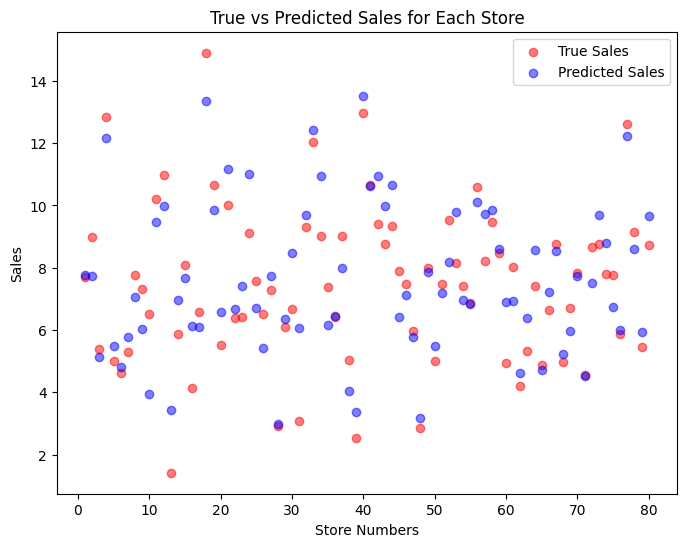

In [40]:
# Plotting true sales and predicted sales for each store
plt.figure(figsize=(8, 6))

# True Sales (Red)
plt.scatter(sales_df['Store Numbers'], sales_df['True Sales'], color='red', alpha=0.5, label='True Sales')

# Predicted Sales (Blue)
plt.scatter(sales_df['Store Numbers'], sales_df['Predicted Sales'], color='blue', alpha=0.5, label='Predicted Sales')

plt.title('True vs Predicted Sales for Each Store')
plt.xlabel('Store Numbers')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [41]:
# Calculating the performance difference 
sales_df['Performance'] = sales_df['True Sales'] - sales_df['Predicted Sales']
sales_df.head()

,Store Numbers,True Sales,Predicted Sales,Performance
255,1,7.71,7.776605,-0.066605
346,2,8.97,7.732829,1.237171
228,3,5.40,5.149481,0.250519
384,4,12.85,12.174810,0.675190
269,5,5.01,5.501342,-0.491342


In [51]:
# Filtering overperforming and underperforming based on performance
overperforming_df = sales_df[sales_df['Performance'] < 0]
underperforming_df = sales_df[sales_df['Performance'] > 0]

In [52]:
# Obtaining orignal features for the overperforming stores
overperforming_df = pd.merge(overperforming_df, df, left_index=True, right_index=True)
overperforming_df.drop(columns=['True Sales', 'Store Numbers'], inplace = True)
overperforming_df.head()

,Predicted Sales,Performance,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
255,7.776605,-0.066605,7.71,123,81,8,198,81,Bad,80,15,Yes,Yes
269,5.501342,-0.491342,5.01,159,69,0,438,166,Medium,46,17,Yes,No
104,4.816677,-0.196677,4.62,121,96,0,472,138,Medium,51,12,Yes,No
102,5.760550,-0.460550,5.30,113,22,0,57,97,Medium,65,16,No,No
50,3.439732,-2.019732,1.42,99,32,18,341,108,Bad,80,16,Yes,Yes


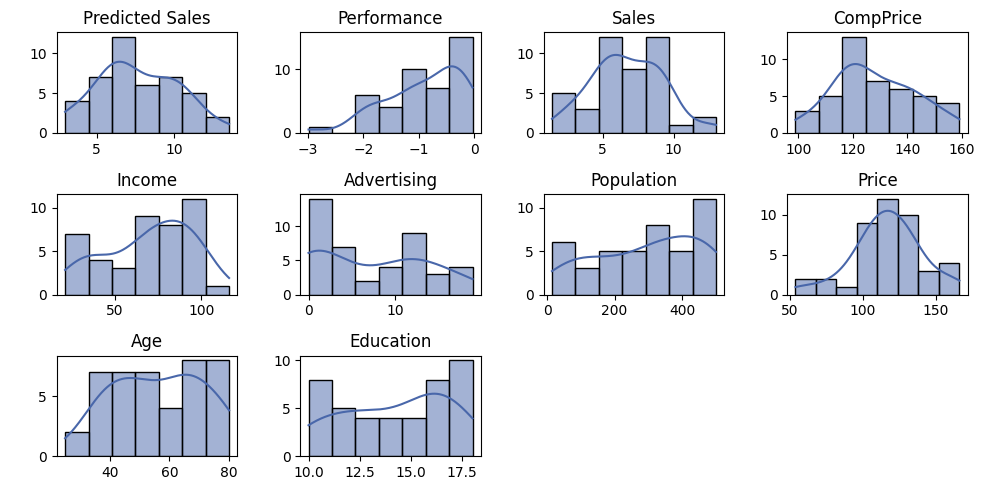

In [53]:
# Visualizing the features for overperforming stores
num_features_overp = overperforming_df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features_overp):
    ax = fig.add_subplot(3, 4, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features_overp, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

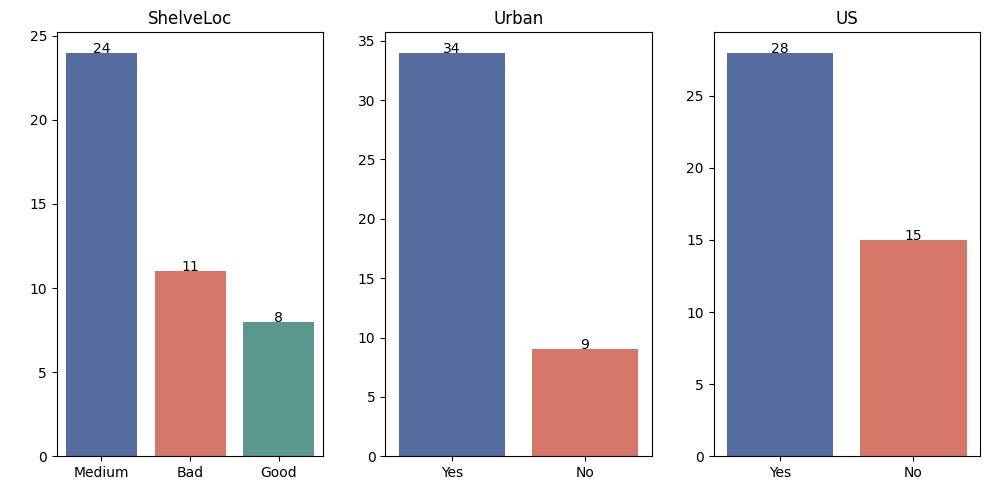

In [54]:
cat_features_overp = overperforming_df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features_overp):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_overperforming_df = overperforming_df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_overperforming_df, x=value_counts_overperforming_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_overperforming_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

In [55]:
# Obtaining orignal features for the underperforming stores
underperforming_df = pd.merge(underperforming_df, df, left_index=True, right_index=True)
underperforming_df.drop(columns=['True Sales', 'Store Numbers'], inplace = True)
underperforming_df.head()

,Predicted Sales,Performance,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
346,7.732829,1.237171,8.97,132,107,0,144,125,Medium,33,13,No,No
228,5.149481,0.250519,5.40,149,73,13,381,163,Bad,26,11,No,Yes
384,12.174810,0.675190,12.85,123,37,15,348,112,Good,28,12,Yes,Yes
263,7.047328,0.722672,7.77,116,26,6,434,115,Medium,25,17,Yes,Yes
61,6.018968,1.301032,7.32,105,32,0,358,107,Medium,26,13,No,No


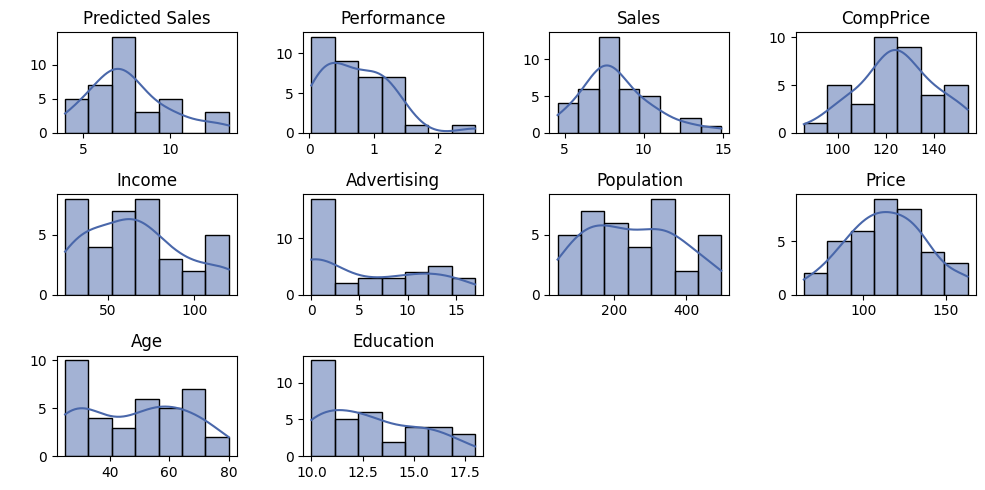

In [56]:
# Visualizing the features for overperforming stores
num_features_underp = underperforming_df.select_dtypes(["float64", "int64"])

fig = plt.figure(figsize=(10, 5))

# Define the custom color using the hex code
custom_color = '#4967AA'

for i, j in enumerate(num_features_underp):
    ax = fig.add_subplot(3, 4, i + 1)
    
    # Use the specified custom color for histplots
    ax = sns.histplot(data=num_features_underp, x=j, color=custom_color, kde=True, bins='auto') 
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

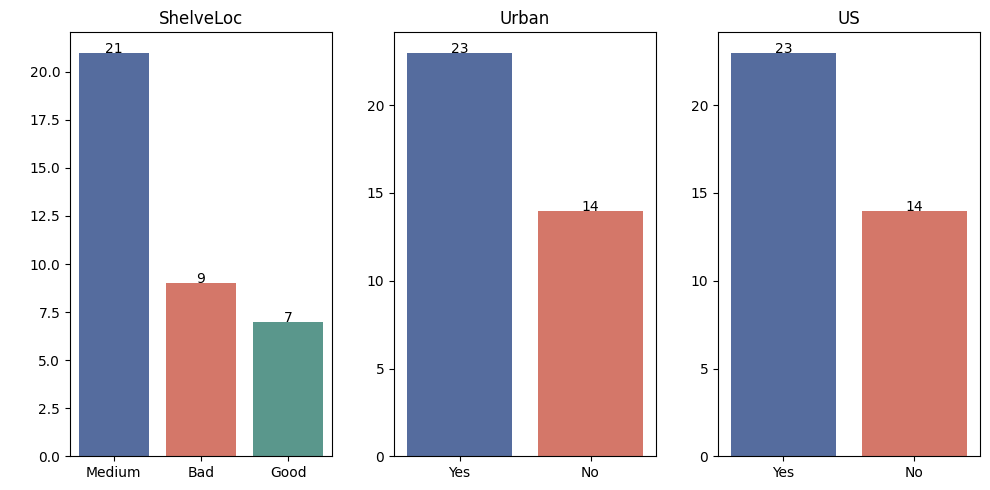

In [57]:
cat_features_underp = underperforming_df.select_dtypes('object')

# Define the custom color palette
custom_palette = ['#4967AA', '#E66A57', '#50A192']

fig = plt.figure(figsize=(10, 5))

for i, j in enumerate(cat_features_underp):
    ax = fig.add_subplot(1, 3, i + 1)
    
    # Recalculate data frame for the specific column
    value_counts_underperforming_df = underperforming_df[j].value_counts().sort_values(ascending=False).to_frame()
    
    # Create barplot using the custom color palette
    ax = sns.barplot(data=value_counts_underperforming_df, x=value_counts_underperforming_df.index, y=j, palette=custom_palette)
    
    # Create text annotations
    text = value_counts_underperforming_df[j]
    for x, y in enumerate(text):
        ax.text(x, y, y, horizontalalignment='center')
    
    ax.set_ylabel(' ')
    ax.set_xlabel('')
    ax.set_title(j)

plt.tight_layout()
plt.show()

# Trying out classification

 Inspired by the following article: https://www.researchgate.net/publication/370702005_Construction_and_analysis_of_prediction_model_for_sales_of_child_car_seats

In [32]:
# Copying the dataframe 
df2 = df.copy()
df2.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13


In [33]:
# Creating the new binary feature based on 'Sales'
df2['Sales_Category'] = df2['Sales'].apply(lambda x: 1 if x > 8 else 0)

df2.head()

,Sales,Income,Advertising,Population,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,PriceDiff,Sales_Category
0,9.50,73,11,276,42,17,1,0,0,0,1,0,1,-18,1
1,11.22,48,16,260,65,10,0,1,0,0,1,0,1,-28,1
2,10.06,35,10,269,59,12,0,0,1,0,1,0,1,-33,1
3,7.40,100,4,466,55,14,0,0,1,0,1,0,1,-20,0
4,4.15,64,3,340,38,13,1,0,0,0,1,1,0,-13,0


In [35]:
# Dropping the 'Sales' feature as it's directly related to the target
df2.drop(columns=['Sales'], inplace=True)

# Splitting the data into features (X) and target (y)
X = df2.drop(columns=['Sales_Category'])
y = df2['Sales_Category']

# Now you can proceed with model training using X as features and y as the target variable
# For instance, using scikit-learn to train a classifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
predictions = clf.predict(X_test)

# Assess accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.775


In [40]:
from sklearn.linear_model import LogisticRegression
# Initialize a Decision Tree Classifier
lr = LogisticRegression(random_state=42, max_iter = 10000000)

# Train the classifier
lr.fit(X_train, y_train)

# Make predictions
predictions = lr.predict(X_test)

# Assess accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8375


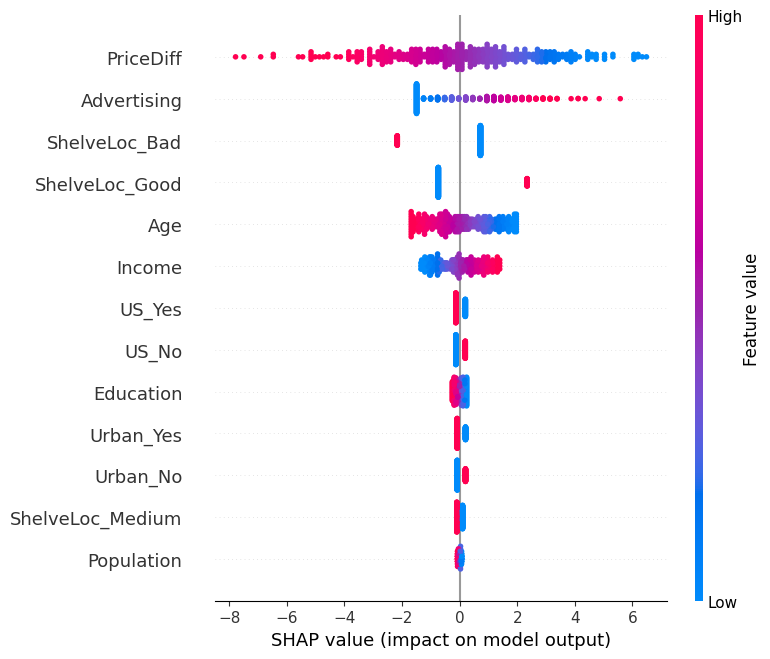

In [42]:
# Create an explainer object using the trained logistic regression model and the training data
explainer = shap.Explainer(lr, X_train)

# Calculate SHAP values for all of the training data
shap_values = explainer.shap_values(X_train)

# Summary plot to visualize feature importance based on SHAP values
shap.summary_plot(shap_values, X_train)

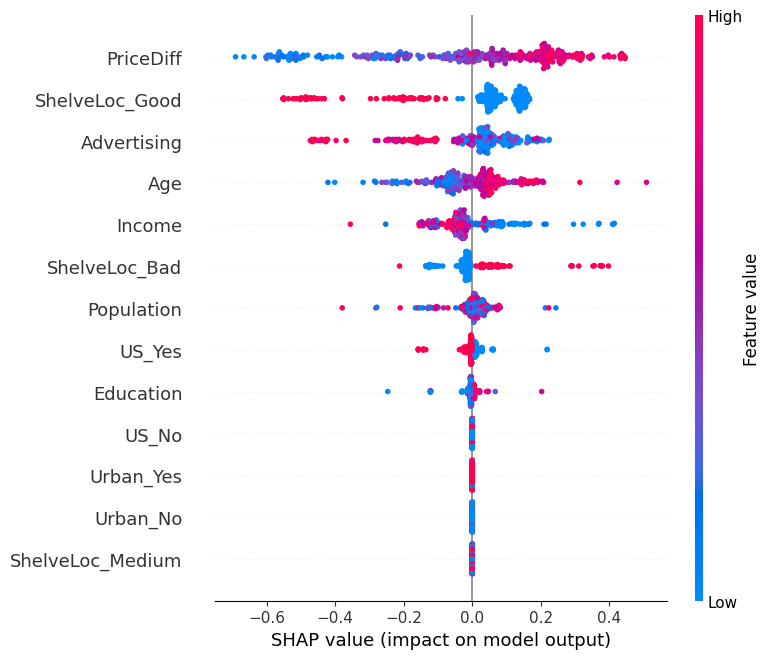

In [43]:
# Now, let's generate SHAP values for feature importance
import shap

# Create an explainer object using the trained model and the training data
explainer = shap.Explainer(clf, X_train)

# Calculate SHAP values for all of the training data
shap_values = explainer.shap_values(X_train)

# Summary plot to visualize feature importance based on SHAP values
shap.summary_plot(shap_values[0], X_train)

By using this we can see how PriceDiff has a great impact for determining wheter a store performs good or bad. However, We can also see how extreme values in Shelve location has a creater impact on determining low performance. There are poentially more to be derived from this graph, but could be hard to explain what SHAP values actually are. 

This could be a way to look at the features to determine resrouce allocation for the store managers for the given store. By doing this we have also incorpirated another ML model into our analysis. 